## Understanding the Univariate and Multivariate Normal Distribution

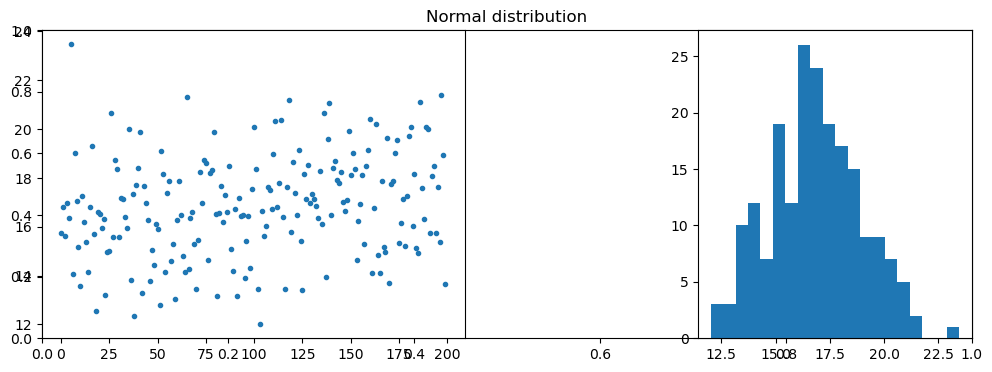

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
N = 200

# Mean
mu = 17

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X = np.random.normal(mu, s, N).T
# or equally:
X = np.random.randn(N).T * s + mu

# Plot the samples and histogram
plt.figure(figsize=(12, 4))
plt.title("Normal distribution")
plt.subplot(1, 2, 1)
plt.plot(X, ".")
plt.subplot(1, 3, 3)
plt.hist(X, bins=nbins)
plt.show()

Theoretical mean:  17
Theoretical std.dev.:  2
Empirical mean:  17.110560183049373
Empirical std.dev.:  2.081362215382137


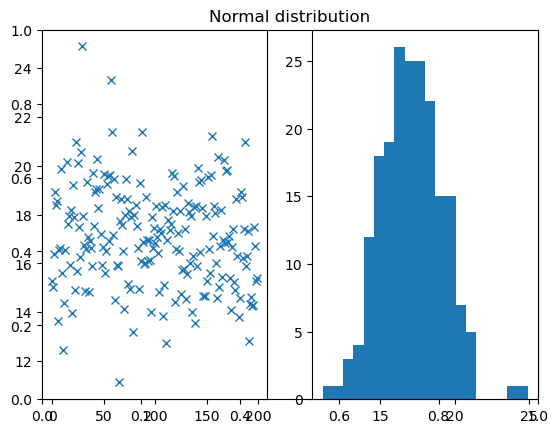

In [2]:
# exercise 4.1.2

import numpy as np
import matplotlib.pyplot as plt

# Number of samples
N = 200

# Mean
mu = 17

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X = np.random.normal(mu, s, N).T
# or equally:
X = np.random.randn(N).T * s + mu


# Compute empirical mean and standard deviation
mu_ = X.mean()
s_ = X.std(ddof=1)

print("Theoretical mean: ", mu)
print("Theoretical std.dev.: ", s)
print("Empirical mean: ", mu_)
print("Empirical std.dev.: ", s_)

# Plot the samples and histogram
plt.figure()
plt.title("Normal distribution")
plt.subplot(1, 2, 1)
plt.plot(X, "x")
plt.subplot(1, 2, 2)
plt.hist(X, bins=nbins)
plt.show()

Also, the function plots the
true probability density function
(scipy.stats.norm.pdf()) of the Normal distribution.
Show that when the number of samples N is increased, the histogram approximates the
pdf better and the empirical estimates of the mean and standard deviation improve.

Theoretical mean:  17
Theoretical std.dev.:  2
Empirical mean:  16.972696699104766
Empirical std.dev.:  1.9940364573030624


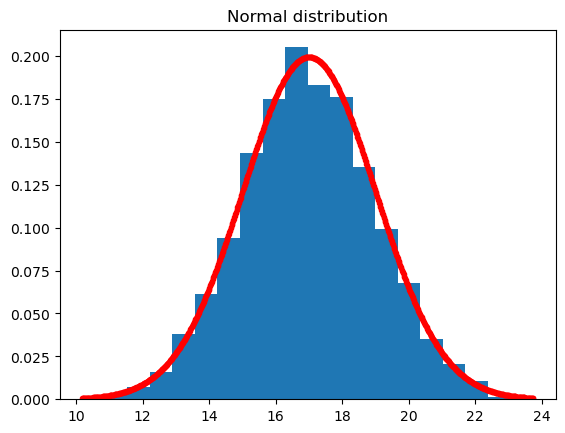

In [3]:
# exercise 4.1.3
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Number of samples
N = 4000

# Mean
mu = 17

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X = np.random.normal(mu, s, N).T
# or equally:
X = np.random.randn(N).T * s + mu

# Plot the histogram
f = plt.figure()
plt.title("Normal distribution")
plt.hist(X, bins=nbins, density=True)

# Over the histogram, plot the theoretical probability distribution function:
x = np.linspace(X.min(), X.max(), 1000)
pdf = stats.norm.pdf(x, loc=17, scale=2)
plt.plot(x, pdf, ".", color="red")

# Compute empirical mean and standard deviation
mu_ = X.mean()
s_ = X.std(ddof=1)

print("Theoretical mean: ", mu)
print("Theoretical std.dev.: ", s)
print("Empirical mean: ", mu_)
print("Empirical std.dev.: ", s_)

plt.show()

### 2D normal distribution

In [4]:
# exercise 4.2.4

import numpy as np

# Number of samples
N = 1000

# Mean
mu = np.array([13, 17])

# Covariance matrix
S = np.array([[4, 3], [3, 9]])

# Generate samples from the Normal distribution
X = np.random.multivariate_normal(mu, S, N)
X, X.shape

(array([[11.17513646, 18.48254652],
        [ 8.14692195, 10.47733279],
        [11.62978689, 14.95334048],
        ...,
        [12.33916158, 15.19335526],
        [12.64726102, 16.64059403],
        [13.2884857 , 16.0585728 ]]),
 (1000, 2))

### 2D Norm visualization

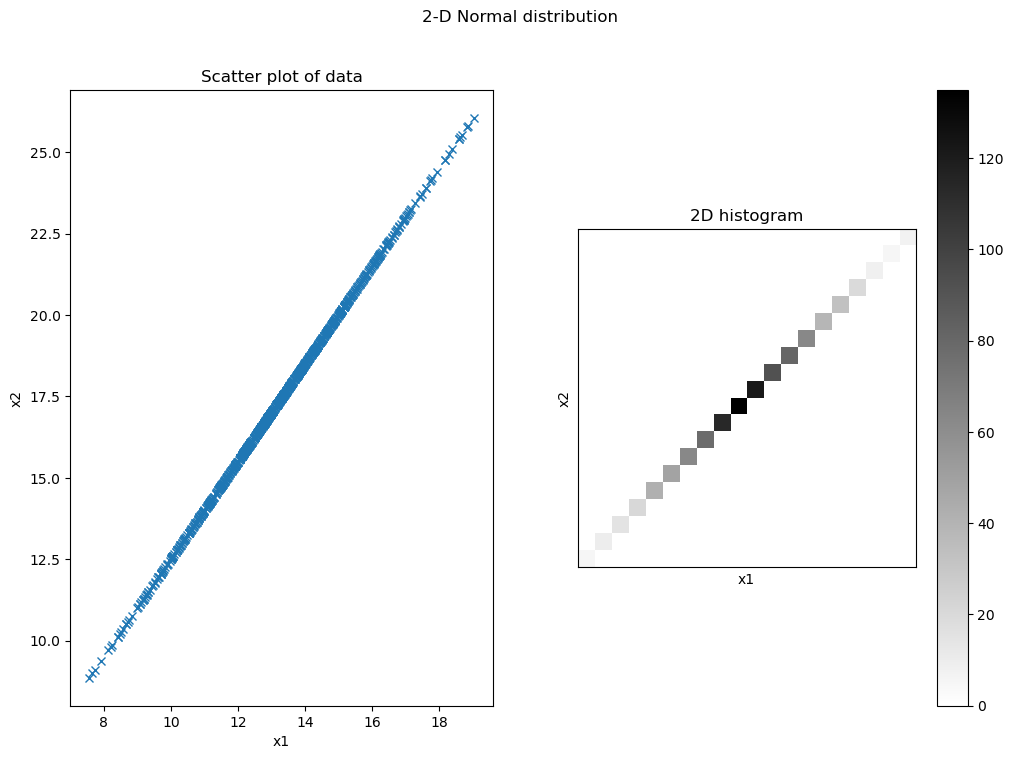

In [5]:
# exercise 4.1.5

import numpy as np
import matplotlib.pyplot as plt

# Number of samples
N = 1000

# Standard deviation of x1
s1 = 2

# Standard deviation of x2
s2 = 3

# Correlation between x1 and x2
corr = 1

# Covariance matrix
S = np.matrix([[s1 * s1, corr * s1 * s2], [corr * s1 * s2, s2 * s2]])

# Mean
mu = np.array([13, 17])

# Number of bins in histogram
nbins = 20

# Generate samples from multivariate normal distribution
X = np.random.multivariate_normal(mu, S, N)


# Plot scatter plot of data
plt.figure(figsize=(12, 8))
plt.suptitle("2-D Normal distribution")

plt.subplot(1, 2, 1)
plt.plot(X[:, 0], X[:, 1], "x")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of data")

plt.subplot(1, 2, 2)
x = np.histogram2d(X[:, 0], X[:, 1], nbins)
plt.imshow(x[0], cmap=plt.cm.gray_r, interpolation="None", origin="lower")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.xticks([])
plt.yticks([])
plt.title("2D histogram")

plt.show()

Show that when the correlation between x1 and x2 is zero, the scatter plot and 2-d
histogram have the shape of an axis-aligned ellipse. Can you explain why?
Show that when the correlation between x1 and x2 is one, the values of x1 and x2 fall
on a straight line. Can you explain why?

![explain1](images/explain1.png)

![explain2](images/explain2.png)

## Digits dataset

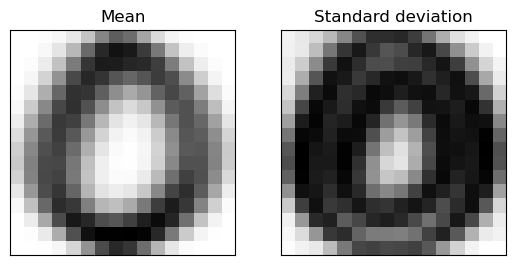

In [6]:
# exercise 4.1.6
import importlib_resources
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from scipy.io import loadmat

filename = importlib_resources.files("dtuimldmtools").joinpath("data/zipdata.mat")
# Digits to include in analysis (to include all: n = range(10))
n = [0]

# Load Matlab data file to python dict structure
# and extract variables of interest
traindata = loadmat(filename)["traindata"]
X = traindata[:, 1:]
y = traindata[:, 0]
N, M = X.shape
C = len(n)

# Remove digits that are not to be inspected
class_mask = np.zeros(N).astype(bool)
for v in n:
    cmsk = y == v
    class_mask = class_mask | cmsk
X = X[class_mask, :]
y = y[class_mask]
N = np.shape(X)[0]

mu = X.mean(axis=0)
s = X.std(ddof=1, axis=0)
S = np.cov(X, rowvar=0, ddof=1)

plt.figure()
plt.subplot(1, 2, 1)
I = np.reshape(mu, (16, 16))
plt.imshow(I, cmap=plt.cm.gray_r)
plt.title("Mean")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
I = np.reshape(s, (16, 16))
plt.imshow(I, cmap=plt.cm.gray_r)
plt.title("Standard deviation")
plt.xticks([])
plt.yticks([])

plt.show()

For each pixel we now have a mean and a standard deviation, i.e., 256 means and 256 corresponding standard deviations. So in essence we can make a a simple model of the digits with a Normal distributions for each individual pixel.

Since we know how to draw a new sample from a Normal distribution we can draw a sample for
each individual pixel based on their respective 1D normal distribution (i.e. draw a total of 256 values). Combining these samples we end up with a new digit. The question is now how natural our newly generated/artificial samples are, and if they at all are possible to recognize as digits.

With our simple model above we argued that we had 256 different 1D Normal distributions;
however, we could also look at the problems in terms of the multivariate Normal. Instead of assuming 256 independent 1D Gaussians we could formulate our model for digits as a 256-
dimensional multivariate Normal, which allows each pixel to depend on the other pixels. This
dependency is described through the covariance matrix.

## 1D Normal distribution vs 2D Normal distribution

In [10]:
# exercise 4.1.7

import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

filename = importlib_resources.files("dtuimldmtools").joinpath("data/zipdata.mat")
# Digits to include in analysis (to include all, n = range(10) )
n = [1]

# Number of digits to generate from normal distributions
ngen = 10

# Load Matlab data file to python dict structure
# and extract variables of interest
traindata = loadmat(filename)["traindata"]
X = traindata[:, 1:]
y = traindata[:, 0]
N, M = np.shape(X)  # or X.shape
C = len(n)

# Remove digits that are not to be inspected
class_mask = np.zeros(N).astype(bool)
for v in n:
    cmsk = y == v
    class_mask = class_mask | cmsk
X = X[class_mask, :]
y = y[class_mask]
N = np.shape(X)[0]  # or X.shape[0]

mu = X.mean(axis=0)
s = X.std(ddof=1, axis=0)
S = np.cov(X, rowvar=0, ddof=1)

# Generate 10 samples from 1-D normal distribution
Xgen = np.random.randn(ngen, 256)
for i in range(ngen):
    Xgen[i] = np.multiply(Xgen[i], s) + mu


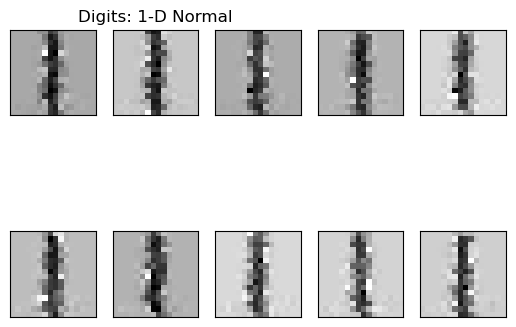

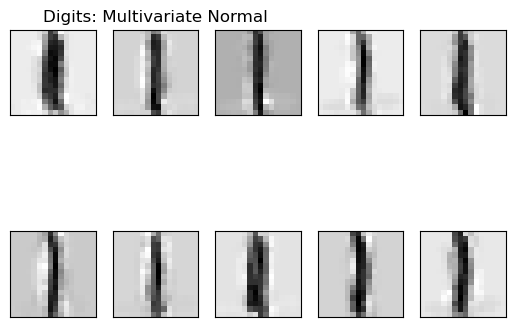

In [11]:
plt.figure()
for k in range(ngen):
    plt.subplot(2, int(np.ceil(ngen / 2.0)), k + 1)
    I = np.reshape(Xgen[k, :], (16, 16))
    plt.imshow(I, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    if k == 1:
        plt.title("Digits: 1-D Normal")


# Generate 10 samples from multivariate normal distribution
Xmvgen = np.random.multivariate_normal(mu, S, ngen)
# Note if you are investigating a single class, then you may get:
# """RuntimeWarning: covariance is not positive-semidefinite."""
# Which in general is troublesome, but here is due to numerical imprecission


# Plot images
plt.figure()
for k in range(ngen):
    plt.subplot(2, int(np.ceil(ngen / 2.0)), k + 1)
    I = np.reshape(Xmvgen[k, :], (16, 16))
    plt.imshow(I, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    if k == 1:
        plt.title("Digits: Multivariate Normal")

plt.show()